<a href="https://colab.research.google.com/github/Khushi0212/Prediciting-outcomes-of-polices-cases/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHORS: Khushi Sharma, David Saavedra, Alejandro Ramirez

#INTRODUCTION

In this project the dataset talks about the crime incidents of Cincinnati. Incidents are the records, of reported crimes, collected by an agency for management. Incidents are typically housed in a Records Management System (RMS) that stores agency-wide data about law enforcement operations.
The main goal of this machine learning algorithm is to find out if we can predict the outcome of all the case.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import seaborn as sns

# INITAL DATA EXPLORATION

The following data was downloaded on 5/9/22 from

https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf

In [ ]:
input_file = "https://raw.githubusercontent.com/DavidESaavedra/dataScience/main/PDI__Police_Data_Initiative__Crime_Incidents.csv"
df = pd.read_csv(input_file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,21,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


What does a typical data entry look like?

In [ ]:
df.head()

,INSTANCEID,INCIDENT_NO,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,UCR,DST,BEAT,OFFENSE,...,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD,Unnamed: 40
0,D5FFCE5D-2393-4683-90E7-33BCDC284583,229010800,05/07/2022 06:21:04 PM,05/07/2022 12:30:00 PM,05/07/2022 12:35:00 PM,NaN,802.0,4,3,AGGRAVATED MENACING,...,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,PART 2 MINOR,45229,AVONDALE,AVONDALE,NaN
1,164CFAA6-E580-419F-BE01-E4FCA6130607,229010816,05/07/2022 06:03:00 PM,05/07/2022 05:30:00 PM,05/07/2022 06:00:00 PM,F--CLEARED BY ARREST - ADULT,600.0,4,4,THEFT,...,NaN,NaN,NaN,1.0,NaN,THEFT,45229,PADDOCK HILLS,NORTH AVONDALE - PADDOCK HILLS,NaN
2,707DAD69-A4FD-4E31-8A64-CEDEE0F8CBF1,229010805,05/07/2022 05:08:43 PM,05/07/2022 02:00:00 PM,05/07/2022 02:30:00 PM,F--CLEARED BY ARREST - ADULT,802.0,3,2,AGGRAVATED MENACING,...,NaN,NaN,NaN,1.0,NaN,PART 2 MINOR,45205,WEST PRICE HILL,WEST PRICE HILL,NaN
3,95F8F27D-A8E1-418C-8E71-2F6F410832C0,229010810,05/07/2022 05:08:00 PM,05/07/2022 05:00:00 PM,05/07/2022 05:07:00 PM,NaN,810.0,2,1,ASSAULT,...,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,PART 2 MINOR,45206,EAST WALNUT HILLS,EAST WALNUT HILLS,NaN
4,A68CB864-F891-4F6A-982E-8447A8487C11,229010804,05/07/2022 04:48:10 PM,05/07/2022 03:00:00 PM,05/07/2022 03:35:00 PM,I--INVESTIGATION PENDING,600.0,3,3,THEFT,...,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,2.0,THEFT,45211,WESTWOOD,WESTWOOD,NaN


A typical entry starts with information such as 'intanceid' which is followed by the incident no. and the date it was reported on and the kind of offence the crimial is aressted along with some other information on the location on the crime and a breif discription of the criminal which includes the sex, race, ethnicity etc, of the following criminal.

How many row/columns are there in the dataset?

What types of columns are there in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54998 entries, 0 to 54997
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   INSTANCEID                      54998 non-null  object 
 1   INCIDENT_NO                     54998 non-null  object 
 2   DATE_REPORTED                   54934 non-null  object 
 3   DATE_FROM                       54998 non-null  object 
 4   DATE_TO                         54952 non-null  object 
 5   CLSD                            54632 non-null  object 
 6   UCR                             54961 non-null  float64
 7   DST                             54998 non-null  object 
 8   BEAT                            54942 non-null  object 
 9   OFFENSE                         54964 non-null  object 
 10  LOCATION                        54998 non-null  object 
 11  THEFT_CODE                      17971 non-null  object 
 12  FLOOR                           

There are about 1000 rows/entries and 40 coulumns. Of those 40 columns 4 are float type, 4 are int type and 32 are object type.

In [ ]:
df.describe()

,UCR,HOUR_TO,LATITUDE_X,TOTALSUSPECTS
count,54961.000000,54956.000000,48333.000000,30075.000000
mean,867.333637,912.069201,39.107065,1.531771
std,491.497898,799.495518,2.027759,1.036419
min,0.000000,0.000000,-84.588618,1.000000
25%,600.000000,140.000000,39.117137,1.000000
50%,600.000000,812.500000,39.136005,1.000000
75%,862.000000,1644.000000,39.155724,2.000000
max,2761.000000,2359.000000,39.293537,17.000000


#DATA PREPROCESSING


Let's take a look at the different kinds of crimes in the record.

In [ ]:
df['OFFENSE'].value_counts()[:10]

THEFT                            17958
CRIMINAL DAMAGING/ENDANGERING     8458
ASSAULT                           5766
DOMESTIC VIOLENCE                 3369
FELONIOUS ASSAULT                 2602
BURGLARY                          2123
AGGRAVATED MENACING               2109
BREAKING AND ENTERING             1688
AGGRAVATED ROBBERY                1528
MENACING                          1159
Name: OFFENSE, dtype: int64

Investigating the new column that was created named Unnamed: 40

In [ ]:
df['Unnamed: 40'].isna().sum() / df.shape[0]

0.9997636277682825

It appears a column was formatted incorrectly, it should be safe to drop any rows which contain values and then drop the entire column. Removing the incorrectly formatted rows also allows us to change the TOTALNUMBERVICTIMS column into floats.

In [ ]:
df = df[df['Unnamed: 40'].isna()]
df.drop(columns=['Unnamed: 40'], inplace=True)
df['TOTALNUMBERVICTIMS'] = df['TOTALNUMBERVICTIMS'].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Investigating the DST column

In [ ]:
df['DST'].value_counts(normalize=True)

3                   0.324234
4                   0.230608
5                   0.183996
2                   0.121633
1                   0.098227
CENTRAL BUSINESS    0.040902
OTHER               0.000400
Name: DST, dtype: float64

All districts except central business are displayed as a number. Doing a bit of research tells us that the city of cincinatti has 6 districts, meaning we can assign central business as district 6 and drop where the district is 'OTHER' as well as turn all the columns into floats.

In [ ]:
mask = (df['DST'] == 'CENTRAL BUSINESS')
df.loc[mask, 'DST'] = 6
df = df[df['DST'] != 'OTHER']
df.loc['DST'] = df['DST'].astype(float)

Some columns provide general information about a crimes location which as individual values probably would't provide too much information. Instead of using those columns we create new columns which contains whether or not this information was provided.

In [ ]:
df['OPENING_USED_KNOWN'] = (~(df['OPENING'].isna())).astype(float)
df['SIDE_USED_KNOWN'] = (~(df['SIDE'].isna())).astype(float)

These column were difficult to deal with or these columns did not provide much information on individual cases.

Example: date of clearance is only known after closed outcome is known

In [ ]:
df.drop(columns=['INSTANCEID', "DATE_REPORTED", "DATE_FROM", "DATE_TO", "CPD_NEIGHBORHOOD", "COMMUNITY_COUNCIL_NEIGHBORHOOD", "SNA_NEIGHBORHOOD", "DATE_OF_CLEARANCE", 'INCIDENT_NO', 'BEAT', 'FLOOR', 'SIDE', 'OPENING', 'RPT_AREA', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X', 'ZIP'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54964 entries, 0 to DST
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLSD                54597 non-null  object 
 1   UCR                 54926 non-null  float64
 2   DST                 54963 non-null  object 
 3   OFFENSE             54929 non-null  object 
 4   LOCATION            54963 non-null  object 
 5   THEFT_CODE          17947 non-null  object 
 6   HATE_BIAS           54961 non-null  object 
 7   DAYOFWEEK           53286 non-null  object 
 8   WEAPONS             54959 non-null  object 
 9   HOUR_FROM           54963 non-null  object 
 10  HOUR_TO             54921 non-null  float64
 11  VICTIM_AGE          54963 non-null  object 
 12  VICTIM_RACE         47571 non-null  object 
 13  VICTIM_ETHNICITY    47571 non-null  object 
 14  VICTIM_GENDER       47571 non-null  object 
 15  SUSPECT_AGE         54963 non-null  object 
 16  SUSPECT_RAC

In the following dataset the column 'HOUR FROM' is appeared as a object type but it should have been a flot type,so it has been fixed below in the following way.

In [ ]:
df['HOUR_FROM'] = df['HOUR_FROM'].astype(float)

The following part represents the following ways in which the case must have been closed.

In [ ]:
df['CLSD'].value_counts()

Z--EARLY CLOSED                    16235
J--CLOSED                          13566
F--CLEARED BY ARREST - ADULT       11310
H--WARRANT ISSUED                   4425
D--VICTIM REFUSED TO COOPERATE      3075
I--INVESTIGATION PENDING            2778
K--UNFOUNDED                        1724
G--CLEARED BY ARREST - JUVENILE     1159
B--PROSECUTION DECLINED              223
A--DEATH OF OFFENDER                  64
E--JUVENILE/NO CUSTODY                36
U--UNKNOWN                             2
Name: CLSD, dtype: int64

#Preparing Data for machine learning


Remove clsd outcomes wich account for less than 1 percent

In [ ]:
treshold = .01
df = df[df['CLSD'].isin(df['CLSD'].value_counts().index[(~(df['CLSD'].value_counts(normalize=True) < treshold))])]

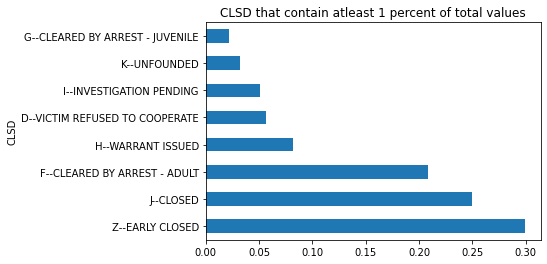

In [ ]:
df['CLSD'].value_counts(normalize=True).plot.barh()
plt.title("CLSD that contain atleast 1 percent of total values")
plt.ylabel("CLSD");

The about plot represents the cases that contain atleast 1% of the total value.

In [ ]:
# ordinal encoding
ordinal_map = { 'Z--EARLY CLOSED': 0,
'J--CLOSED': 1,
'F--CLEARED BY ARREST - ADULT': 2,
'H--WARRANT ISSUED': 3,
'D--VICTIM REFUSED TO COOPERATE': 4,
'I--INVESTIGATION PENDING': 5,
'K--UNFOUNDED': 6,
'G--CLEARED BY ARREST - JUVENILE': 7,
'B--PROSECUTION DECLINED': 8,
'A--DEATH OF OFFENDER': 9,
'E--JUVENILE/NO CUSTODY': 10,
'U--UNKNOWN': 11, }

df["CLSD"] = df['CLSD'].map(ordinal_map)

In [ ]:
df['CLSD'].value_counts()

0    16235
1    13566
2    11310
3     4425
4     3075
5     2778
6     1724
7     1159
Name: CLSD, dtype: int64

Created and encoding variables so we can run KNN and split or test and training data.

In [ ]:
df2 = pd.get_dummies(df, drop_first=True)
target = 'CLSD'
predictors =  df2.columns[df2.columns != target]
X = df2[predictors].values
y = df2[target].values
predictors =  df2.columns[df2.columns != target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Infinite and nan values can cause issues with running KNN, we first look for fractions in the columns that would give us issues

In [ ]:
(~np.isfinite(df2[df2[predictors].columns[((~(np.isfinite(X_train))).sum(axis=0)).astype(bool)]])).sum() / df2.shape[0]

UCR                   0.000663
HOUR_TO               0.000774
TOTALNUMBERVICTIMS    0.001732
TOTALSUSPECTS         0.455852
dtype: float64

About half of all rows under the TOTALSUSPECTS column have non finite values


For convenience, we should be able to drop all columns where there are low non finite values and then try dealing with the TOTALSUSPECTS column

In [ ]:
df2 = df2[((np.isfinite(df['UCR'])) & (np.isfinite(df['HOUR_TO'])) & (np.isfinite(df['TOTALNUMBERVICTIMS'])))]

Impute the nan values with the mode

In [ ]:
df2['TOTALSUSPECTS'].fillna(df['TOTALSUSPECTS'].mode().values[0]);

Their are still many nan values in the data that we decided to drop them

In [ ]:
df2.dropna(inplace=True)

Now we can define our final testing and training data

In [ ]:
X = df2[predictors].values
y = df2[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Computing Baseline accuracy

The baseline accuracy in a classification problem tells us the accuracy we could achieve if we simply guessed the majority class.

In [ ]:
vals, counts = np.unique(y_train, return_counts=True)
target_mode = vals[counts.argmax()]
print('Most common target value: {}'.format(target_mode))

Most common target value: 1


In [ ]:
print('Baseline accuracy: {}'.format((y_train == target_mode).mean().round(3)))

Baseline accuracy: 0.272


Looking at the 10 best predictor variables

In [ ]:
selector = SelectKBest(mutual_info_classif)
selector.fit(X_train, y_train);

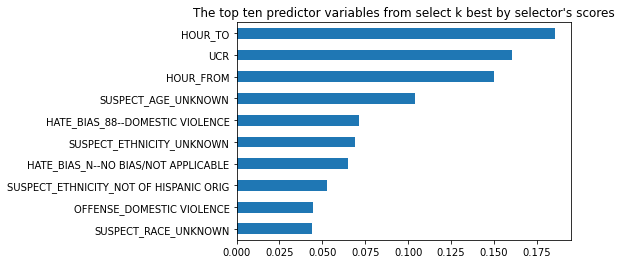

In [ ]:
pd.Series(selector.scores_, index=predictors).sort_values()[-10:].plot.barh()
plt.title("The top ten predictor variables from select k best by selector's scores");

We can start off by looking at KNN with 3 neighbours to and use it as another baseline

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
print(f'Cross-validation accuracy: {cross_val_score(clf, X_train, y_train, cv=5).mean().round(3)}')

Cross-validation accuracy: 0.425


#Forward Feature Selection

Forward feature selection with 15 features

In [ ]:
# use a smaller subset of data to avoid forward selection and grid search taking so long
df3 = df2.sample(5000, random_state=42)
X3 = df3[predictors].values
y3 = df3[target].values

In [ ]:
selector = SequentialFeatureSelector(KNeighborsClassifier(), n_features_to_select=15, cv=5)
selector.fit(X3, y3)
feature_mask = selector.get_support()

Using the features we got with forward feature selection we can improve scores by doing a grid search to find the best parameters to use with our KNN algorithm.

In [ ]:
# getting data for feature selected
X_selected = df2[predictors[feature_mask]]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=0)

In [ ]:
grid = [{'n_neighbors': range(3,16,2),'weights': ['uniform', 'distance'],'p': [1,2]}]
knn_cv = GridSearchCV(KNeighborsClassifier(), grid, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(3, 16, 2), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}])

In [ ]:
print(knn_cv.best_params_)
print('best CV accuracy: {:.3f}'.format(knn_cv.best_score_))

{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
best CV accuracy: 0.468


Our accuracy increased from KNN 3 baseline

#Making prediction and assessing the model

In [ ]:
def plot_learning_curve(clf, X_train, y_train):
    # generate the data; average the values
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # plot the learning curve
    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, optimized KNN')
    plt.legend();

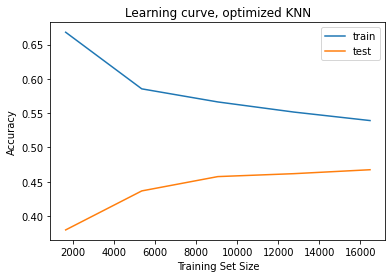

In [ ]:
plot_learning_curve(knn_cv.best_estimator_, X_train, y_train)

#Test Acuuracy


In [ ]:
clf = knn_cv.best_estimator_
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).mean()
print('accuracy: ', acc)

accuracy:  0.46505041350402176


#CONCLUSION


In the end we doubled the baseline accuracy to our final machine learning score. Police with their current cases and it is information can possible predict the status of their current case using the machine learning algorithmn. Overall the close status for criminal cases is going to be very hard to predict since criminal justice process tends to be long, complicated, and in the nature of police cases they are constantly fluctuating.